In [367]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from  IPython.display import clear_output
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
# https://gist.github.com/IAmSuyogJadhav/305bfd9a0605a4c096383408bee7fd5c

# Scipy differential_evolution

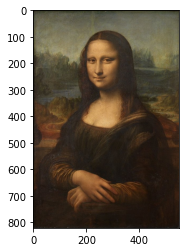

In [368]:
img_obj = cv2.imread("lisa.jpg")
img_obj = cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB)

rows,cols,channels = img_obj.shape  
Img = np.zeros((rows, cols, 3), np.uint8)
plt.imshow(img_obj)
plt.show()


In [369]:
def draw_circle(Img, center_coordinates, color, radius, alpha):
    overlay = Img.copy()
    thickness = -1
    image = cv2.circle(Img, center_coordinates, radius, color, thickness)
    image_new  = cv2.addWeighted(overlay, alpha, image,alpha, 0)
    return image_new

In [370]:
def f(P):
    global img_obj    
    global Img
    img_aux = Img.copy()
    
    center = (int(P[0]),int(P[1]))
    color = (int(P[3]),int(P[4]),int(P[5]))
    r = int(P[2])
    alpha = P[6]
    img_aux = draw_circle(img_aux, center,color,r,alpha)

    return np.sum(np.abs(img_obj-img_aux))

In [371]:
def plot(P, convergence):
    clear_output(wait=True)
    global Img
    Img = draw_circle(Img, (int(P[0]),int(P[1])),(int(P[3]),int(P[4]),int(P[5])),int(P[2]),P[6]) 
    print(f(P))
    plt.imshow(Img)
    plt.show()
    

In [372]:
from scipy.optimize import differential_evolution

bounds = [[0,cols],   
        [0,rows],
        [1,cols/4],             
        [0,255],
        [0,255],
        [0,255],
        [0.1,1]]     

31518932


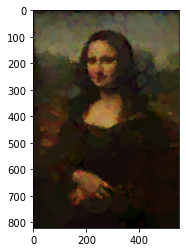

KeyboardInterrupt: 

In [373]:
res = differential_evolution(f, bounds, tol=-10000,maxiter=2000,popsize=100,callback=plot)